## Sources

### Youtube: Theory
1. [StatQuest: Hierarchical Clustering](https://www.youtube.com/watch?v=7xHsRkOdVwo)
2. [Hierarchical Clustering : Agglomerative Clustering and Divisive Clustering](https://www.youtube.com/watch?v=7enWesSofhg)
3. [Agglomerative Clustering (Single Linkage) Part-1 Explained](https://www.youtube.com/watch?v=EFhcDnw7RGY)
4. [Agglomerative Clustering (Single Linkage) Part-2 Explained](https://www.youtube.com/watch?v=G_Ob1k28ZJo)
5. [Clustering: K-means and Hierarchical](https://www.youtube.com/watch?v=QXOkPvFM6NU)
6. [Hierarchical Clustering: Simplilearn](https://www.youtube.com/watch?v=9U4h6pZw6f8): Theory until 18:30

### Youtube: Code
1. [How to Perform Hierarchical Clustering in Python( Step by Step)](https://www.youtube.com/watch?v=v7oLMvcxgFY)

### Websites
1. [A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python: Analytics Vidhya](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)


### Code for sample dataset
Link to download the dataset is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv)

In [51]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# Read data and look at first few rows
# data = pd.read_csv(r"C:\Users\MohammedRoohulAmeen\Downloads\Wholesale customers data.csv")
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [53]:
# # Normalize the data (Normalize function)
# from sklearn.preprocessing import normalize
# data_scaled = normalize(data)
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# data_scaled.head()

In [54]:
# Normalize the data (Normalizer function)
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data)
data_scaled = transformer.transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  
3          0.032749    0.115494  
4          0.070358    0.205294

In [55]:
# # Normalize the data (MinMaxScaler function)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1, 1))
# data_scaled = scaler.fit_transform(data)
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# data_scaled.head()

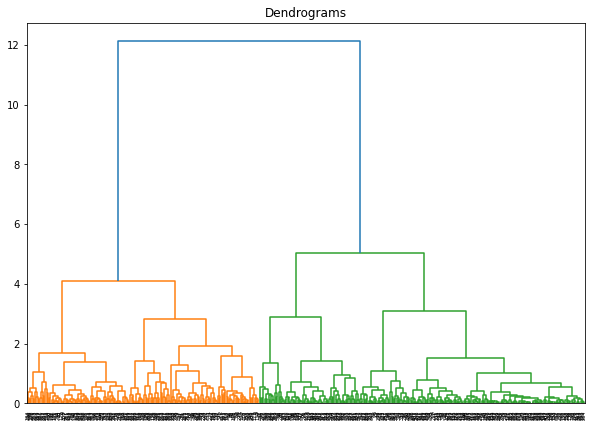

In [56]:
# Create a dendogram of the data
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

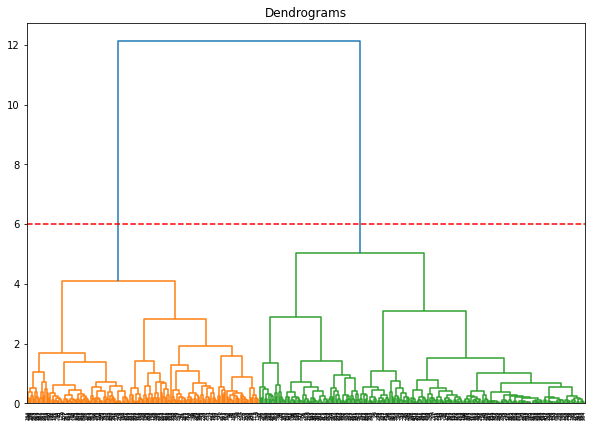

In [57]:
# Add the threshold line to the plot to visualize it

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [58]:
# As we need two clusters, create two clusters of the data
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

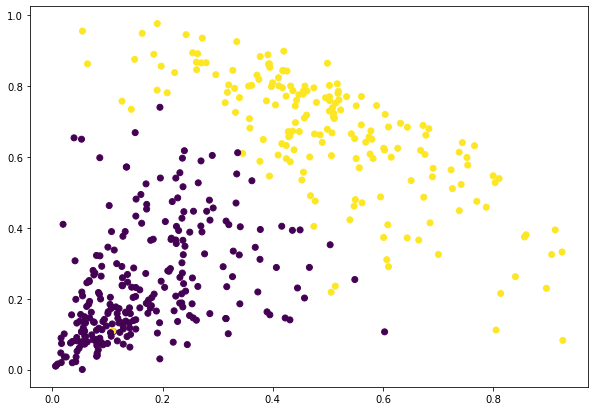

In [59]:
# Plot the clusters (Normalized data)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

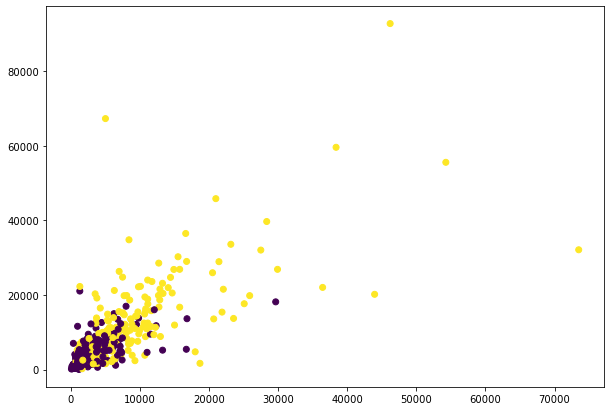

In [60]:
# Plot the clusters (Original data)
plt.figure(figsize=(10, 7))  
plt.scatter(data['Milk'], data['Grocery'], c=cluster.labels_) 

In [61]:
# Assign cluster values to all rows
data['Cluster'] = cluster.labels_
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        1  
1        1776        1  
2        7844        1  
3        1788        0  
4        5185        0

### Code for capstone dataset

In [62]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [63]:
# Read data and look at first few rows
file_path = "D:/MathCo/Capstone Project/GitLab/bajaj_finserv_capstone/Daily_work/New DataSet/Cleaned Data/"
file_name = "BajajDataset_Cleaned_left.csv"
df = pd.read_csv(file_path+file_name)
df.head()

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
0     00:00.0        Haryana      M1             1             1   
1     00:00.0  Uttar Pradesh      M3             1             1   
2     00:00.0  Uttar Pradesh      M1             1             1   
3     00:00.0  Uttar Pradesh      M1             1             1   
4     00:00.0  Uttar Pradesh      M1             1             1   

     PAYMENT_TYPE   CustomerCode           InvoiceNo  LoanTaken    LeadType  \
0  Loan not taken  CUS-272013139  ASDA272011800034_1          0  No Enquiry   
1  Loan not taken  CUS-274651284  ASDA274651800055_1          0  No Enquiry   
2  Loan not taken   CUS-28970748  ASDA289701800008_1          0  No Enquiry   
3  Loan not taken  CUS-295861155  ASDA295861800014_1          0  No Enquiry   
4  Loan not taken    CUS-6568346  ASDA656831800022_1          0  No Enquiry   

  TestRideOffered    FollowUp SourceOfEnquiry FollowUpDone BranchType  \
0      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
1      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
2      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
3      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
4      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   

   TotalAmount       City          State     DealerCity ModelFamily  
0      38081.0    Gurgaon        HARYANA     DHUNDAHERA    Splendor  
1      64326.0  Allahabad  UTTAR PRADESH         SORAON         CBZ  
2      38081.0  Allahabad  UTTAR PRADESH   Hanuman Ganj    Splendor  
3      38081.0  Allahabad  UTTAR PRADESH  Bharwari (NP)    Splendor  
4      46481.0  Allahabad  UTTAR PRADESH   MIYA KA PURA   Star city

## With city columns

In [64]:
# Select required columns to cluster on (Excluding cities)
cluster_df = df[['DealerState','Segment','DealerCity','BranchType','State','ModelFamily','City']]
cluster_df.head()

DealerState Segment     DealerCity BranchType          State ModelFamily  \
0        Haryana      M1     DHUNDAHERA      Urban        HARYANA    Splendor   
1  Uttar Pradesh      M3         SORAON      Urban  UTTAR PRADESH         CBZ   
2  Uttar Pradesh      M1   Hanuman Ganj      Urban  UTTAR PRADESH    Splendor   
3  Uttar Pradesh      M1  Bharwari (NP)      Urban  UTTAR PRADESH    Splendor   
4  Uttar Pradesh      M1   MIYA KA PURA      Urban  UTTAR PRADESH   Star city   

        City  
0    Gurgaon  
1  Allahabad  
2  Allahabad  
3  Allahabad  
4  Allahabad

### Label Encoding method

In [65]:
# Convert categorical values into labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 

labelled_cluster_df = pd.DataFrame()

for column in cluster_df.columns:
    labelled_cluster_df[column] = label_encoder.fit_transform(cluster_df[column]) 
labelled_cluster_df.head()

DealerState  Segment  DealerCity  BranchType  State  ModelFamily  City
0            9        0         166           2     12            6   161
1           28        2         509           2     32            2    10
2           28        0         239           2     32            6    10
3           28        0         114           2     32            6    10
4           28        0         357           2     32            7    10

In [71]:
# Cluster the data using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = labelled_cluster_df.sample(frac=0.01,random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = AgglomerativeClustering(n_clusters=c, affinity='euclidean', linkage='ward')  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 33.56650114059448


In [72]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [73]:
# Cluster the data using KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = labelled_cluster_df.sample(frac=0.01, random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = KMeans(n_clusters=c)  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    elbow_list.append(cluster.inertia_)
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 20.174103021621704


In [74]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [75]:
fig = px.line(x = cluster_list,y = elbow_list)
fig.show()

### Binary encoding method

In [77]:
# Convert categorical values into binary encoded columns
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['DealerState','Segment','DealerCity','BranchType','State','ModelFamily','City'])
df_binary = encoder.fit_transform(cluster_df)

df_binary.head()

DealerState_0  DealerState_1  DealerState_2  DealerState_3  DealerState_4  \
0              0              0              0              0              0   
1              0              0              0              0              1   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              1   

   DealerState_5  Segment_0  Segment_1  Segment_2  Segment_3  ...  City_0  \
0              1          0          0          0          1  ...       0   
1              0          0          0          1          0  ...       0   
2              0          0          0          0          1  ...       0   
3              0          0          0          0          1  ...       0   
4              0          0          0          0          1  ...       0   

   City_1  City_2  City_3  City_4  City_5  City_6  City_7  City_8  City_9  
0       0       0       0       0       0       0       0       0       1  
1       0       0       0       0       0       0       0       1       0  
2       0       0       0       0       0       0       0       1       0  
3       0       0       0       0       0       0       0       1       0  
4       0       0       0       0       0       0       0       1       0  

[5 rows x 45 columns]

In [78]:
# Cluster the data using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = df_binary.sample(frac=0.01,random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = AgglomerativeClustering(n_clusters=c, affinity='euclidean', linkage='ward')  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 44.49600172042847


In [79]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [80]:
# Cluster the data using KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = df_binary.sample(frac=0.01, random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = KMeans(n_clusters=c)  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    elbow_list.append(cluster.inertia_)
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 27.410722255706787


In [81]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [82]:
fig = px.line(x = cluster_list,y = elbow_list)
fig.show()

### One hot encoding method

In [101]:
# Convert categorical values into labels
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(sparse=False) 

ohe_cluster_df = pd.DataFrame()

for column in cluster_df.columns:
    ohe_df = pd.DataFrame(ohe_encoder.fit_transform(cluster_df[column].values.reshape(-1,1)))
    ohe_df.columns = list(map(lambda x: column + "_" + x[3:],ohe_encoder.get_feature_names()))
    ohe_cluster_df = pd.concat([ohe_cluster_df,ohe_df],axis=1)
ohe_cluster_df.head()

DealerState_Andhra Pradesh  DealerState_Arunachal Pradesh  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   DealerState_Assam  DealerState_Bihar  DealerState_Chandigarh  \
0                0.0                0.0                     0.0   
1                0.0                0.0                     0.0   
2                0.0                0.0                     0.0   
3                0.0                0.0                     0.0   
4                0.0                0.0                     0.0   

   DealerState_Chattisgarh  DealerState_Delhi  DealerState_Goa  \
0                      0.0                0.0              0.0   
1                      0.0                0.0              0.0   
2                      0.0                0.0              0.0   
3                      0.0                0.0              0.0   
4                      0.0                0.0              0.0   

   DealerState_Gujarat  DealerState_Haryana  ...  City_Tonk  City_Tumkur  \
0                  0.0                  1.0  ...        0.0          0.0   
1                  0.0                  0.0  ...        0.0          0.0   
2                  0.0                  0.0  ...        0.0          0.0   
3                  0.0                  0.0  ...        0.0          0.0   
4                  0.0                  0.0  ...        0.0          0.0   

   City_Tuticorin  City_Udupi  City_Ujjain  City_Vadodara  City_Visakhapatnam  \
0             0.0         0.0          0.0            0.0                 0.0   
1             0.0         0.0          0.0            0.0                 0.0   
2             0.0         0.0          0.0            0.0                 0.0   
3             0.0         0.0          0.0            0.0                 0.0   
4             0.0         0.0          0.0            0.0                 0.0   

   City_Warangal  City_Yamuna Nagar  City_Yavatmal  
0            0.0                0.0            0.0  
1            0.0                0.0            0.0  
2            0.0                0.0            0.0  
3            0.0                0.0            0.0  
4            0.0                0.0            0.0  

[5 rows x 935 columns]

In [102]:
# Cluster the data using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = ohe_cluster_df.sample(frac=0.01,random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = AgglomerativeClustering(n_clusters=c, affinity='euclidean', linkage='ward')  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 497.878536939621


In [103]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [104]:
# Cluster the data using KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = ohe_cluster_df.sample(frac=0.01, random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = KMeans(n_clusters=c)  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    elbow_list.append(cluster.inertia_)
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 201.45177340507507


In [105]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [106]:
fig = px.line(x = cluster_list,y = elbow_list)
fig.show()

## Without city columns

In [107]:
# Select required columns to cluster on (Excluding cities)
cluster_df = df[['DealerState','Segment','BranchType','State','ModelFamily']]
cluster_df.head()

DealerState Segment BranchType          State ModelFamily
0        Haryana      M1      Urban        HARYANA    Splendor
1  Uttar Pradesh      M3      Urban  UTTAR PRADESH         CBZ
2  Uttar Pradesh      M1      Urban  UTTAR PRADESH    Splendor
3  Uttar Pradesh      M1      Urban  UTTAR PRADESH    Splendor
4  Uttar Pradesh      M1      Urban  UTTAR PRADESH   Star city

### Label Encoding method

In [108]:
# Convert categorical values into labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 

labelled_cluster_df = pd.DataFrame()

for column in cluster_df.columns:
    labelled_cluster_df[column] = label_encoder.fit_transform(cluster_df[column]) 
labelled_cluster_df.head()

DealerState  Segment  BranchType  State  ModelFamily
0            9        0           2     12            6
1           28        2           2     32            2
2           28        0           2     32            6
3           28        0           2     32            6
4           28        0           2     32            7

In [109]:
# Cluster the data using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = labelled_cluster_df.sample(frac=0.01,random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = AgglomerativeClustering(n_clusters=c, affinity='euclidean', linkage='ward')  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 47.631080865859985


In [110]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [111]:
# Cluster the data using KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = labelled_cluster_df.sample(frac=0.01, random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = KMeans(n_clusters=c)  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    elbow_list.append(cluster.inertia_)
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 32.440648317337036


In [112]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [113]:
fig = px.line(x = cluster_list,y = elbow_list)
fig.show()

### Binary encoding method

In [115]:
# Convert categorical values into binary encoded columns
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['DealerState','Segment','BranchType','State','ModelFamily'])
df_binary = encoder.fit_transform(cluster_df)

df_binary.head()

DealerState_0  DealerState_1  DealerState_2  DealerState_3  DealerState_4  \
0              0              0              0              0              0   
1              0              0              0              0              1   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              1   

   DealerState_5  Segment_0  Segment_1  Segment_2  Segment_3  ...  State_1  \
0              1          0          0          0          1  ...        0   
1              0          0          0          1          0  ...        0   
2              0          0          0          0          1  ...        0   
3              0          0          0          0          1  ...        0   
4              0          0          0          0          1  ...        0   

   State_2  State_3  State_4  State_5  State_6  ModelFamily_0  ModelFamily_1  \
0        0        0        0        0        1              0              0   
1        0        0        0        1        0              0              0   
2        0        0        0        1        0              0              0   
3        0        0        0        1        0              0              0   
4        0        0        0        1        0              0              0   

   ModelFamily_2  ModelFamily_3  
0              0              1  
1              1              0  
2              0              1  
3              0              1  
4              1              1  

[5 rows x 24 columns]

In [116]:
# Cluster the data using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = df_binary.sample(frac=0.01,random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = AgglomerativeClustering(n_clusters=c, affinity='euclidean', linkage='ward')  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 54.191168785095215


In [117]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [118]:
# Cluster the data using KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = df_binary.sample(frac=0.01, random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = KMeans(n_clusters=c)  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    elbow_list.append(cluster.inertia_)
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 33.383872985839844


In [119]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [120]:
fig = px.line(x = cluster_list,y = elbow_list)
fig.show()

### One hot encoding method

In [121]:
# Convert categorical values into labels
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(sparse=False) 

ohe_cluster_df = pd.DataFrame()

for column in cluster_df.columns:
    ohe_df = pd.DataFrame(ohe_encoder.fit_transform(cluster_df[column].values.reshape(-1,1)))
    ohe_df.columns = list(map(lambda x: column + "_" + x[3:],ohe_encoder.get_feature_names()))
    ohe_cluster_df = pd.concat([ohe_cluster_df,ohe_df],axis=1)
ohe_cluster_df.head()

DealerState_Andhra Pradesh  DealerState_Arunachal Pradesh  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   DealerState_Assam  DealerState_Bihar  DealerState_Chandigarh  \
0                0.0                0.0                     0.0   
1                0.0                0.0                     0.0   
2                0.0                0.0                     0.0   
3                0.0                0.0                     0.0   
4                0.0                0.0                     0.0   

   DealerState_Chattisgarh  DealerState_Delhi  DealerState_Goa  \
0                      0.0                0.0              0.0   
1                      0.0                0.0              0.0   
2                      0.0                0.0              0.0   
3                      0.0                0.0              0.0   
4                      0.0                0.0              0.0   

   DealerState_Gujarat  DealerState_Haryana  ...  State_UTTARAKHAND  \
0                  0.0                  1.0  ...                0.0   
1                  0.0                  0.0  ...                0.0   
2                  0.0                  0.0  ...                0.0   
3                  0.0                  0.0  ...                0.0   
4                  0.0                  0.0  ...                0.0   

   State_WEST BENGAL  ModelFamily_Apache  ModelFamily_Boxer  ModelFamily_CBZ  \
0                0.0                 0.0                0.0              0.0   
1                0.0                 0.0                0.0              1.0   
2                0.0                 0.0                0.0              0.0   
3                0.0                 0.0                0.0              0.0   
4                0.0                 0.0                0.0              0.0   

   ModelFamily_Discover  ModelFamily_Intruder  ModelFamily_RE  \
0                   0.0                   0.0             0.0   
1                   0.0                   0.0             0.0   
2                   0.0                   0.0             0.0   
3                   0.0                   0.0             0.0   
4                   0.0                   0.0             0.0   

   ModelFamily_Splendor  ModelFamily_Star city  
0                   1.0                    0.0  
1                   0.0                    0.0  
2                   1.0                    0.0  
3                   1.0                    0.0  
4                   0.0                    1.0  

[5 rows x 82 columns]

In [122]:
# Cluster the data using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = ohe_cluster_df.sample(frac=0.01,random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = AgglomerativeClustering(n_clusters=c, affinity='euclidean', linkage='ward')  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 79.2243435382843


In [123]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [124]:
# Cluster the data using KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from time import time

cluster_list = range(2,40)
test_df = ohe_cluster_df.sample(frac=0.01, random_state=100)
sil_list = []
elbow_list = []

start_time = time()
for c in cluster_list:
    cluster = KMeans(n_clusters=c)  
    cluster_labels = cluster.fit_predict(test_df)
    
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(test_df, cluster_labels) 
    
    sil_list.append(silhouette_avg)
    elbow_list.append(cluster.inertia_)
end_time = time()
print("Time taken =",(end_time-start_time))

Time taken = 46.90930104255676


In [125]:
fig = px.line(x = cluster_list,y = sil_list)
fig.show()

In [126]:
fig = px.line(x = cluster_list,y = elbow_list)
fig.show()

In [1]:
column.str.

7

In [2]:
bin(7)

'0b111'

In [ ]:
day_0 day_1 day_2
0      0     0
0      1